In [1]:
#Importing Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from scipy.stats import linregress


In [2]:
#Importing Cleaned Dataframe
import import_ipynb
from Data_Cleaning import df

importing Jupyter notebook from Data_Cleaning.ipynb


In [3]:
df.head()

,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level,company_code,cast_code,genres_code,director_code,popularity_code
0,tt0369610,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,High,299,111,0,128,4
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,High,302,593,0,236,4
2,tt2908446,13.112507,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,High,275,553,1,613,4
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09,High,175,206,0,272,4
4,tt2820852,9.335014,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09,High,298,608,0,284,4


In [17]:
#Data Overview
df.describe()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,company_code,cast_code,genres_code,director_code
count,1286.000000,1286.000000,1286,1286.000000,1286.000000,1286.000000,1.286000e+03,1.286000e+03,1.286000e+03,1286.000000,1286.000000,1286.000000,1286.000000
mean,1.787403,110.257387,2008-06-27 15:10:21.461897472,947.953344,6.280093,2007.012442,5.465058e+07,1.992828e+08,1.243079e+08,161.769829,317.776827,4.851477,392.470451
min,0.015997,63.000000,1972-03-15 00:00:00,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01,-4.139124e+08,-1.000000,-1.000000,0.000000,0.000000
25%,0.666532,97.000000,2006-03-09 06:00:00,179.250000,5.800000,2005.000000,1.519180e+07,2.754364e+07,3.133386e+06,64.000000,158.250000,1.000000,198.250000
50%,1.152386,107.000000,2009-10-10 00:00:00,439.500000,6.300000,2009.000000,3.557164e+07,8.689619e+07,4.532795e+07,174.000000,319.000000,3.000000,389.500000
75%,2.127070,121.000000,2012-01-19 00:00:00,1173.500000,6.800000,2011.000000,7.633686e+07,2.351241e+08,1.471200e+08,277.750000,470.750000,6.000000,585.750000
max,32.985763,201.000000,2071-12-22 00:00:00,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,321.000000,628.000000,17.000000,787.000000
std,2.172417,18.809796,NaN,1255.722722,0.795968,8.061910,5.527116e+07,2.969429e+08,2.184179e+08,112.226833,180.501646,4.386807,223.797602


## Data Exploration

In [18]:
#Top 10 Grossing Films
gross_films = df[['original_title', 'revenue_adj', 'profit']].sort_values('revenue_adj', ascending=False).head(10)
gross_films.set_index(['original_title'], inplace=True) #setting original title as index to makes grouped seaborn barplot
gross_films

,revenue_adj,profit
original_title,,
Avatar,2.827124e+09,2.544506e+09
Star Wars,2.789712e+09,7.643980e+08
Titanic,2.506406e+09,1.645034e+09
The Exorcist,2.167325e+09,4.333061e+08
Jaws,1.907006e+09,4.636540e+08
Star Wars: The Force Awakens,1.902723e+09,1.868178e+09
E.T. the Extra-Terrestrial,1.791694e+09,7.824106e+08
The Avengers,1.443191e+09,1.299558e+09
The Empire Strikes Back,1.424626e+09,5.204000e+08


Text(0, 0.5, 'In Billion US Dollars')

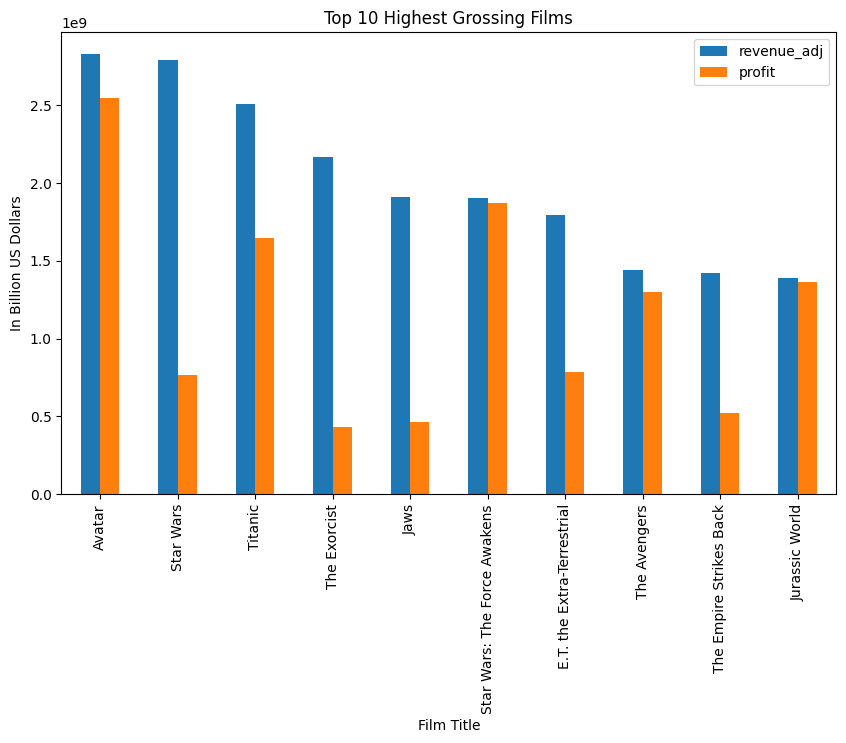

In [19]:
#Setting the bar plot
ax_topfilm = gross_films.plot( kind='bar', title='Top 10 Highest Grossing Films', figsize=(10,6))
ax_topfilm.set_xlabel('Film Title')
ax_topfilm.set_ylabel('In Billion US Dollars')

In [20]:
#Top 10 Most Expensive Films = Films with highest budget to make 
cost_films = df[['original_title', 'revenue_adj', 'budget_adj']].sort_values('budget_adj', ascending=False).head(10).round(0)
cost_films.set_index(['original_title'], inplace=True) #setting original title as index to makes grouped seaborn barplot
cost_films


,revenue_adj,budget_adj
original_title,,
The Warrior's Way,1.108757e+07,425000000.0
Pirates of the Caribbean: On Stranger Tides,9.904175e+08,368371256.0
Pirates of the Caribbean: At World's End,1.010654e+09,315500575.0
Titanic,2.506406e+09,271692064.0
Spider-Man 3,9.369017e+08,271330494.0
Tangled,5.917949e+08,260000000.0
Avengers: Age of Ultron,1.292632e+09,257599887.0
Harry Potter and the Half-Blood Prince,9.492765e+08,254100109.0
Harry Potter and the Deathly Hallows: Part 1,9.543059e+08,250000000.0


Text(0, 0.5, 'In Billion US Dollars')

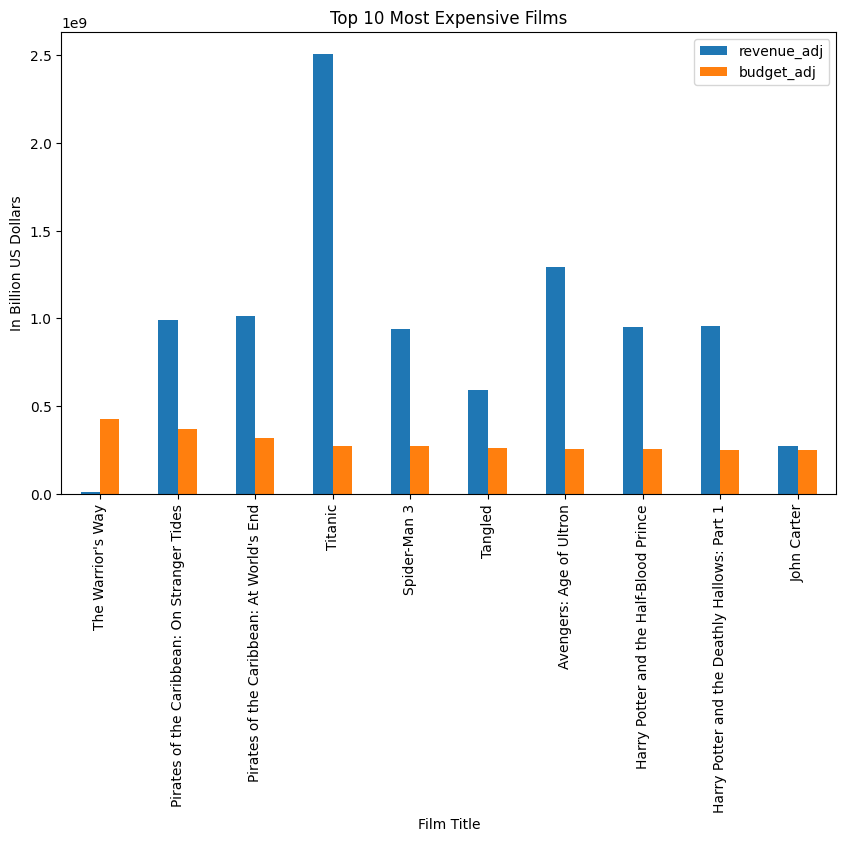

In [21]:
#Setting the bar plot
ax_rev = cost_films.plot( kind='bar', title='Top 10 Most Expensive Films', figsize=(10,6))
ax_rev.set_xlabel('Film Title')
ax_rev.set_ylabel('In Billion US Dollars')

In [22]:
# highest grossing actors, director and company
df.head()

,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level,company_code,cast_code,genres_code,director_code,popularity_code
0,tt0369610,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,High,299,111,0,128,4
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,High,302,593,0,236,4
2,tt2908446,13.112507,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,High,275,553,1,613,4
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09,High,175,206,0,272,4
4,tt2820852,9.335014,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09,High,298,608,0,284,4


In [23]:
#Top 10 Highest Grossing Actors
actor_data = df[['cast', 'revenue_adj']].groupby('cast')['revenue_adj'].sum().nlargest(10)
actor_data

cast
Daniel Radcliffe     6.501686e+09
Robert Downey Jr.    6.056458e+09
Mark Hamill          5.468157e+09
Harrison Ford        5.241622e+09
Tom Hanks            5.086213e+09
Johnny Depp          5.082194e+09
Sean Connery         4.829055e+09
Tom Cruise           4.784807e+09
Roger Moore          3.704604e+09
Elijah Wood          3.671076e+09
Name: revenue_adj, dtype: float64

Text(0, 0.5, 'In Billion US Dollars')

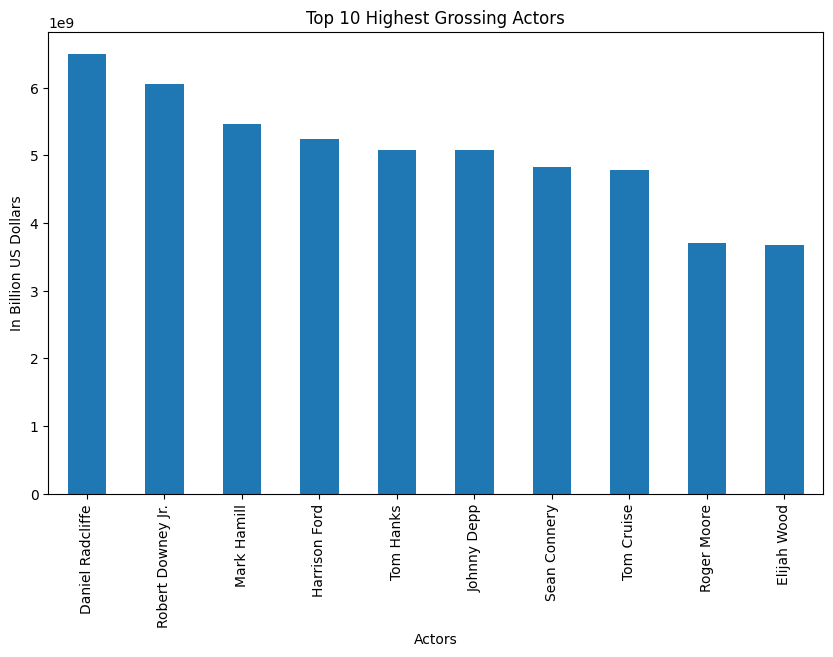

In [24]:
#Create the bar plot
ax_act = actor_data.plot( kind='bar', title='Top 10 Highest Grossing Actors', figsize=(10,6))
ax_act.set_xlabel('Actors')
ax_act.set_ylabel('In Billion US Dollars')

In [25]:
#Top Grossing Directors
dir_data = df[['director', 'revenue_adj']].groupby('director')['revenue_adj'].sum().nlargest(10)
dir_data

director
Steven Spielberg     9.623372e+09
Peter Jackson        6.364545e+09
George Lucas         5.749136e+09
James Cameron        5.518233e+09
David Yates          4.177455e+09
Christopher Nolan    4.026410e+09
Sam Raimi            3.390581e+09
Gore Verbinski       3.261547e+09
Michael Bay          3.174484e+09
Francis Lawrence     3.067993e+09
Name: revenue_adj, dtype: float64

C:\Users\Ahmad Fadlan Amin\AppData\Local\Temp\ipykernel_1104\3556044767.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,2,4,6,8,10])


[Text(0, 0.0, '0'),
 Text(0, 2000000000.0, '2'),
 Text(0, 4000000000.0, '4'),
 Text(0, 6000000000.0, '6'),
 Text(0, 8000000000.0, '8'),
 Text(0, 10000000000.0, '10'),
 Text(0, 12000000000.0, '')]

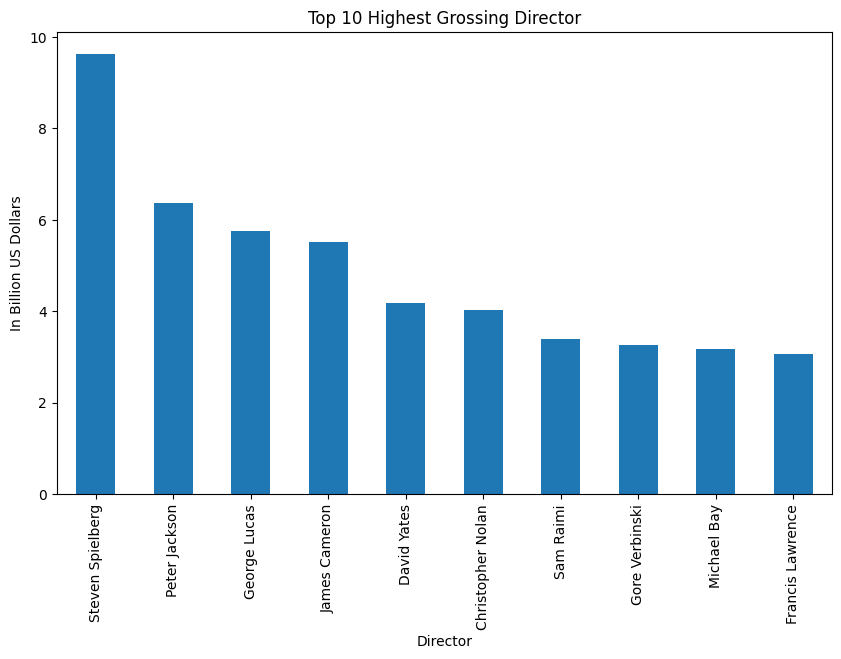

In [26]:
#Create the bar plot
ax = dir_data.plot( kind='bar', title='Top 10 Highest Grossing Director', figsize=(10,6))
ax.set_xlabel('Director')
ax.set_ylabel('In Billion US Dollars')
ax.set_yticklabels([0,2,4,6,8,10])

In [27]:
#Production Companies 
comp_data = df[['production_companies', 'revenue_adj', 'profit']].groupby('production_companies').agg({'revenue_adj':'sum','profit':'sum'}).nlargest(10, 'revenue_adj')
comp_data['revenue_adj'] = pd.to_numeric(comp_data['revenue_adj'])
comp_data


,revenue_adj,profit
production_companies,,
Universal Pictures,2.568572e+10,1.571262e+10
Walt Disney Pictures,2.479361e+10,1.644781e+10
Paramount Pictures,1.887533e+10,1.221766e+10
Columbia Pictures,1.706600e+10,1.142789e+10
Lucasfilm,1.063573e+10,5.398060e+09
Village Roadshow Pictures,8.019050e+09,4.747148e+09
Twentieth Century Fox Film Corporation,7.940042e+09,5.360367e+09
Warner Bros.,6.906455e+09,3.983997e+09
Eon Productions,6.687066e+09,1.305556e+09


C:\Users\Ahmad Fadlan Amin\AppData\Local\Temp\ipykernel_1104\1875136321.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_comp.set_yticklabels([0,5,10,15,20,25])


[Text(0, 0.0, '0'),
 Text(0, 5000000000.0, '5'),
 Text(0, 10000000000.0, '10'),
 Text(0, 15000000000.0, '15'),
 Text(0, 20000000000.0, '20'),
 Text(0, 25000000000.0, '25'),
 Text(0, 30000000000.0, '')]

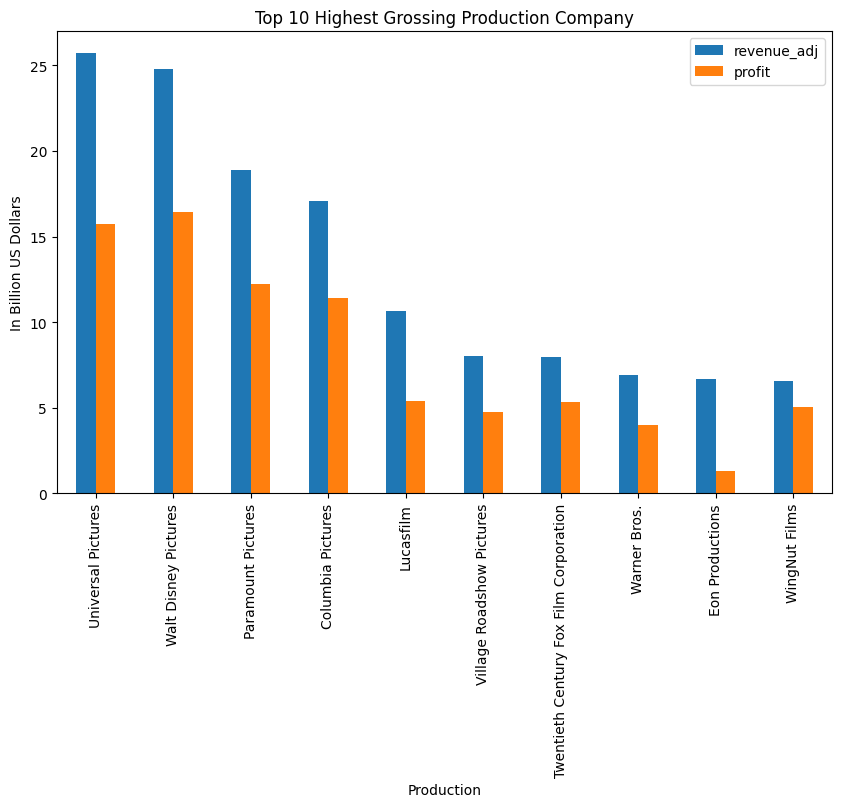

In [28]:
#Bar plot
ax_comp = comp_data.plot( kind='bar', title='Top 10 Highest Grossing Production Company', figsize=(10,6))
ax_comp.set_xlabel('Production')
ax_comp.set_ylabel('In Billion US Dollars')
ax_comp.set_yticklabels([0,5,10,15,20,25])

Data Distribution

<Axes: ylabel='Frequency'>

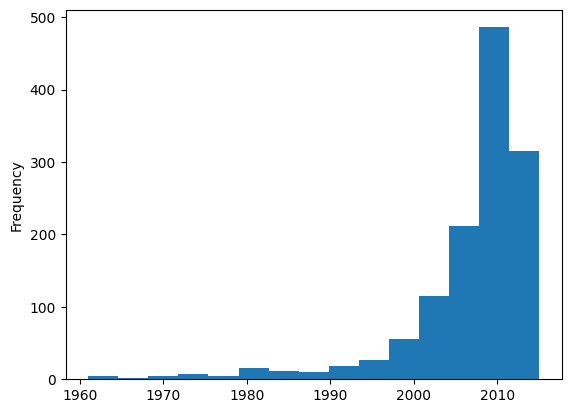

In [29]:
#Release year distribution
df['release_year'].plot(kind='hist', bins=15)

<Axes: ylabel='Frequency'>

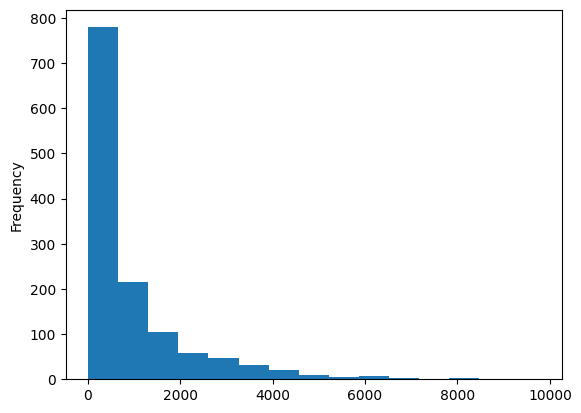

In [30]:
#Vote Count Distribution
df['vote_count'].plot(kind='hist', bins=15)

<Axes: ylabel='Frequency'>

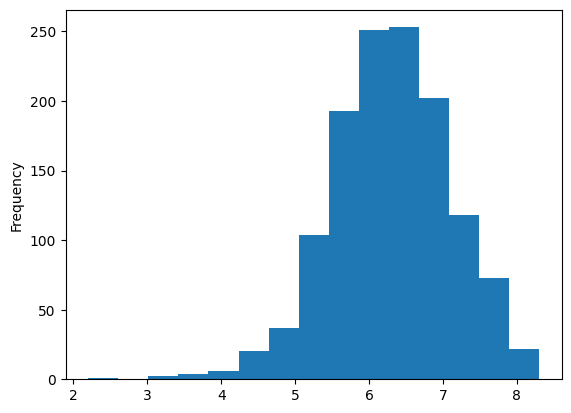

In [31]:
#Ratings Distribution
df['vote_average'].plot(kind='hist', bins=15)

<Axes: ylabel='Frequency'>

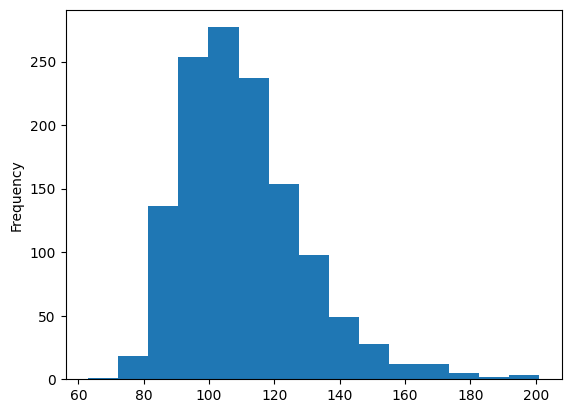

In [32]:
#Runtime Distribution
df['runtime'].plot(kind='hist', bins=15)

<Axes: ylabel='Frequency'>

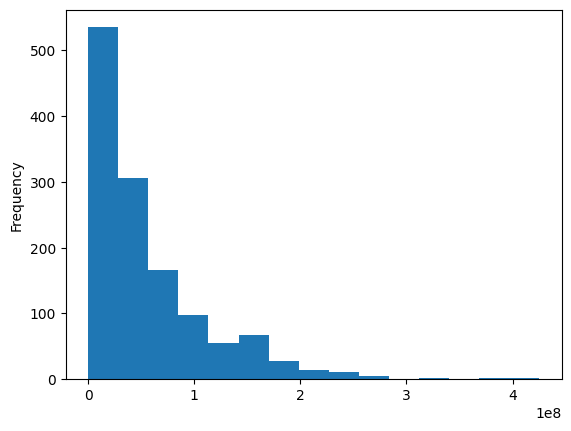

In [33]:
#Budget Distribution
df['budget_adj'].plot(kind='hist', bins=15)

<Axes: ylabel='Frequency'>

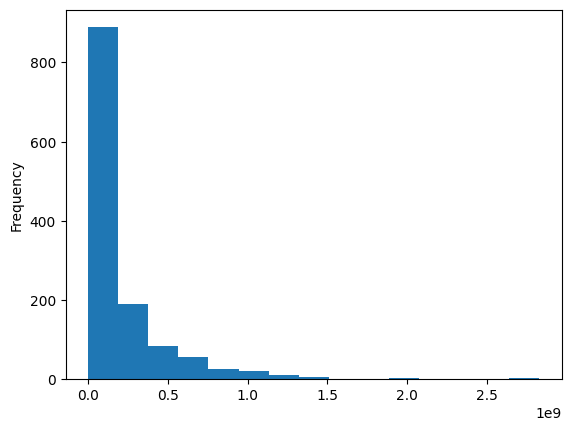

In [34]:
#Budget Distribution
df['revenue_adj'].plot(kind='hist', bins=15)

<Axes: ylabel='Frequency'>

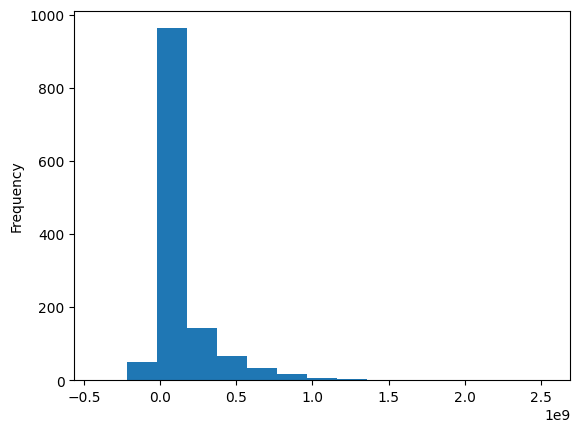

In [35]:
#Profit Distribution
df['profit'].plot(kind='hist', bins=15)

## Time Series, Linear Regression and Correlation

(<Figure size 700x700 with 2 Axes>, <Axes: >)

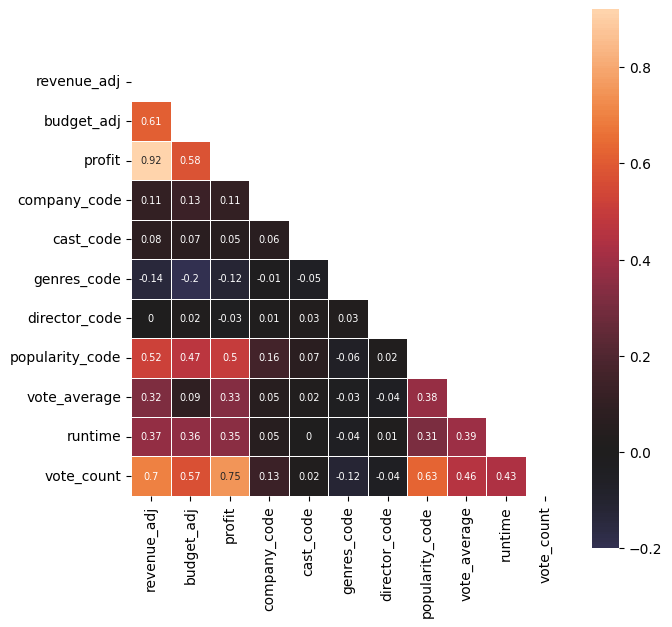

In [165]:
#Correlation of revenue, profit, budget, casts, director, production company, genres
#Initial hypothesis 1 : there's a correlation of budget, casts, director, production company and genre over revenue and profit
#Initial hyphthesis 2 : there's a correlation of budget, vote average, popularity level(code) and runtime  over revenue and profit 

df_corr1 = df[['revenue_adj', 'budget_adj', 'profit',  'company_code', 'cast_code', 'genres_code', 'director_code', 'popularity_code','vote_average', 'runtime', 'vote_count']]
corr_1 = df_corr1.dropna().corr().round(2) #create the correlation
mask_1 = np.triu(np.ones_like(corr_1)) #create the mask to remove top diagonal

#Correlation heatmap 
plt.figure(figsize=(7,7)) , sns.heatmap(corr_1, annot=True, square=True, center=0, annot_kws={'fontsize':7 }, linewidths=0.5,  mask=mask_1)

#Strong Correlation of Profit and Revenue is budget, popularity

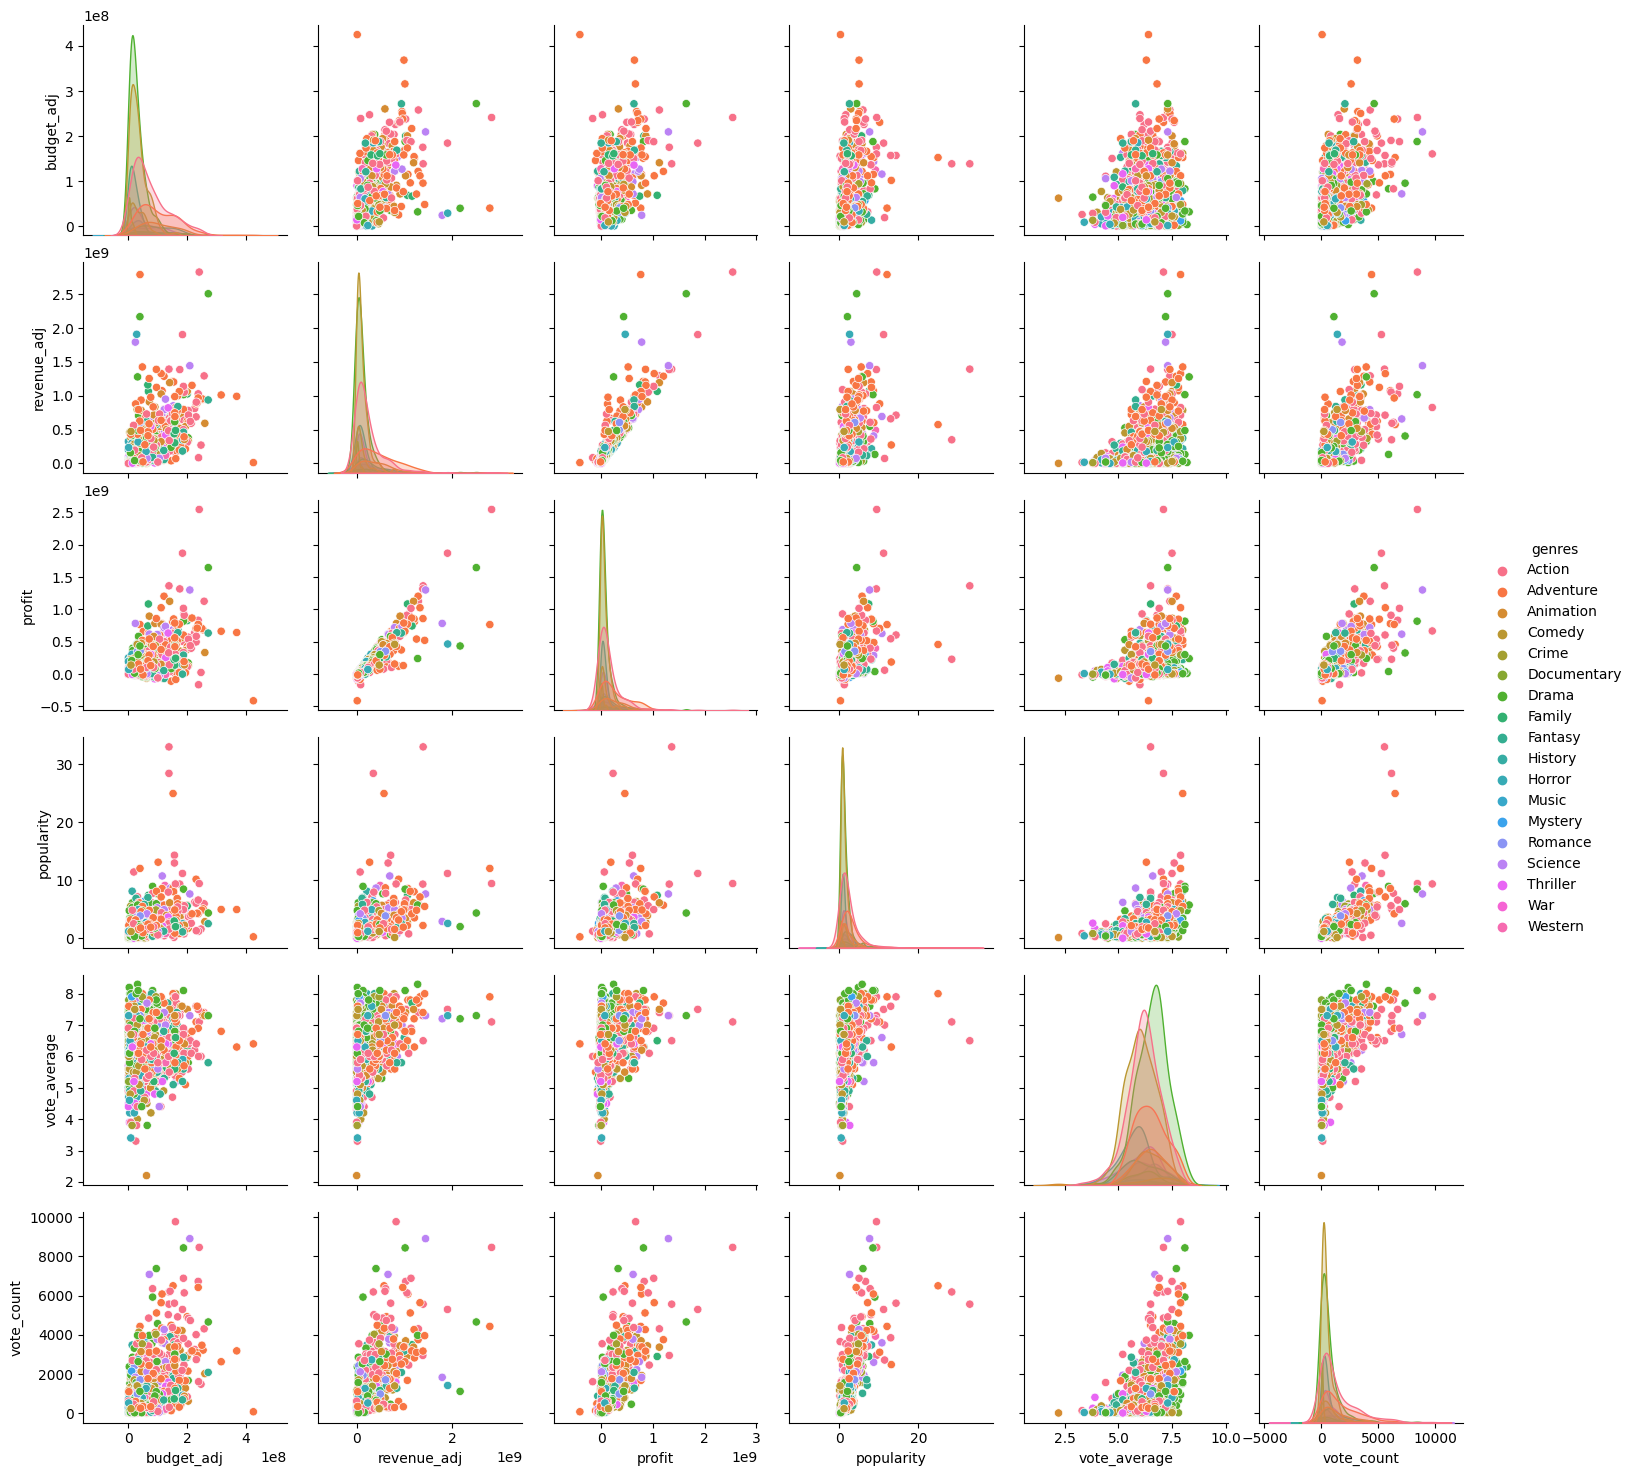

In [37]:
#Pair plot for revenue, budget, profit, vote_average and popularity
sns.pairplot(df, 
             vars=['budget_adj','revenue_adj', 'profit','popularity', 'vote_average','vote_count']
             ,hue='genres')

Text(0.5, 1.0, 'Revenue x Rating Scatterplot')

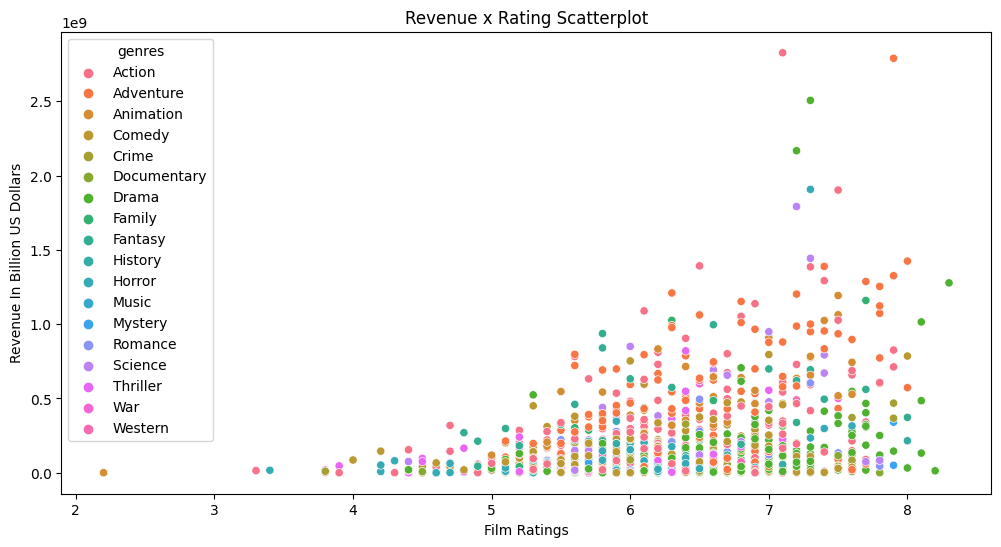

In [7]:
# Relationship of Runtime and Film Ratings
df_prvg = df[['revenue_adj', 'vote_average', 'genres']]

#Create the plot
fig,ax = plt.subplots(figsize=(12,6))

ax = sns.scatterplot(x='vote_average', y='revenue_adj', hue='genres', data=df_prvg)
ax.set_ylabel('Revenue In Billion US Dollars')
ax.set_xlabel('Film Ratings')
ax.set_title('Revenue x Rating Scatterplot')

C:\Users\Ahmad Fadlan Amin\AppData\Local\Temp\ipykernel_30232\554103911.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,0,100,200,300,400])


[Text(-100000000.0, 0, '0'),
 Text(0.0, 0, '0'),
 Text(100000000.0, 0, '100'),
 Text(200000000.0, 0, '200'),
 Text(300000000.0, 0, '300'),
 Text(400000000.0, 0, '400'),
 Text(500000000.0, 0, '')]

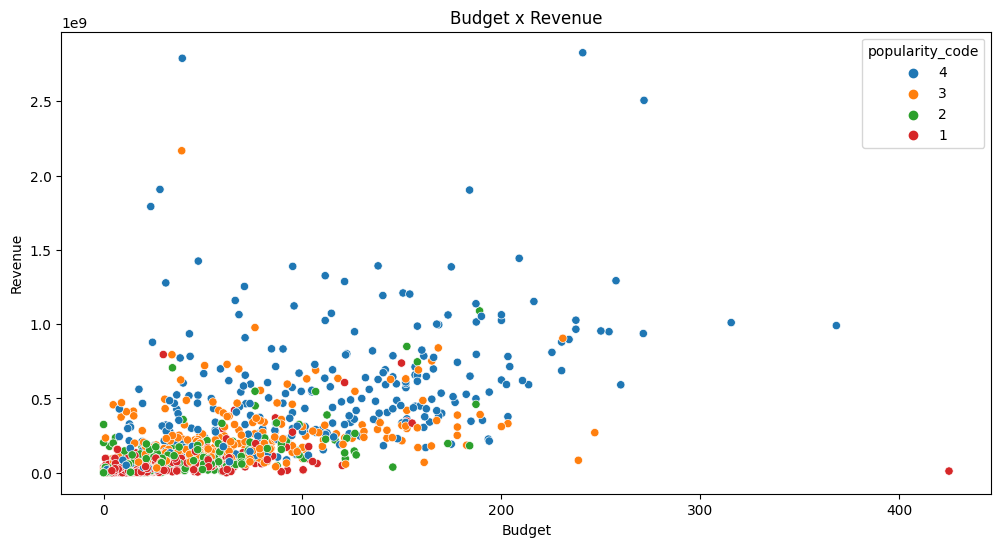

In [171]:
# Relationship of Runtime and Budget
df_rtbd = df[['budget_adj', 'revenue_adj', 'popularity_code']]

#Create the plot
fig,ax = plt.subplots(figsize=(12,6))

ax = sns.scatterplot(x='budget_adj', y='revenue_adj', hue='popularity_code', data=df_rtbd)
ax.set_ylabel('Revenue')
ax.set_xlabel('Budget')
ax.set_title('Budget x Revenue')
ax.set_xticklabels([0,0,100,200,300,400])

In [40]:
#Average Revenue and Ratings timeseries from the year 1990
yearly_pop = df[['release_year', 'budget_adj', 'revenue_adj']].sort_values('release_year')
yearly_pop = yearly_pop[yearly_pop['release_year'] > 1989]

#Group by the year, with sum of profit and revenue
yearly_pop = yearly_pop.groupby('release_year').agg({'budget_adj':'mean','revenue_adj':'mean'})

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Film Revenue (In Hundred Million Dollar)'),
 Text(0.5, 1.0, 'Average Film Revenue')]

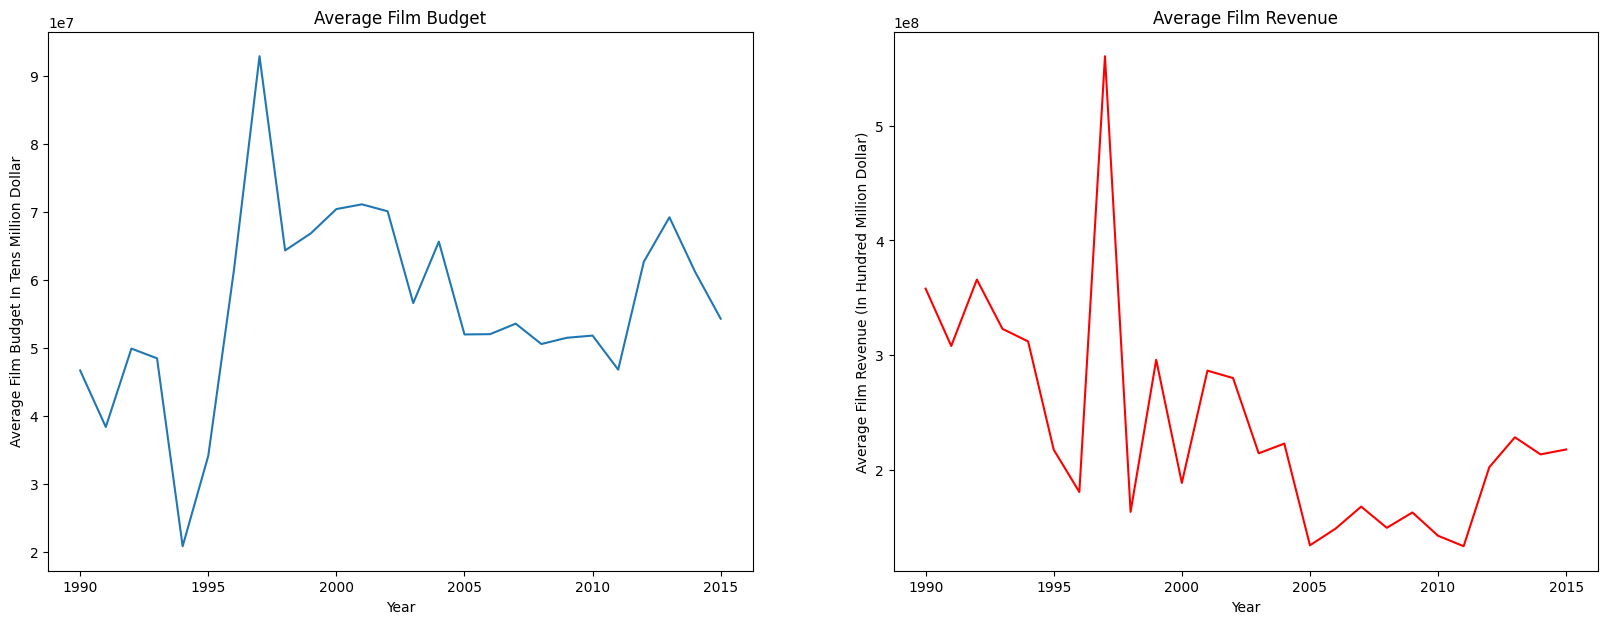

In [41]:
#Create the timeseries 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

#Revenue
ax1 = sns.lineplot(data=yearly_pop, x=yearly_pop.index, y='budget_adj', ax=ax[0])
ax1.set(xlabel='Year', ylabel='Average Film Budget In Tens Million Dollar', title='Average Film Budget')

#Popularity
ax2 = sns.lineplot(data=yearly_pop, x=yearly_pop.index, y='revenue_adj', color='red', ax=ax[1])
ax2.set(xlabel='Year', ylabel='Average Film Revenue (In Hundred Million Dollar)', title='Average Film Revenue')

In [42]:
#Revenue and Profit timeseries from the year 1990
yearly_data_2 = df[['release_year', 'revenue_adj', 'profit']].sort_values('release_year')
yearly_data_2 = yearly_data_2[yearly_data_2['release_year'] > 1989]

#Group by the year, with sum of profit and revenue
yearly_data_2 = yearly_data_2.groupby('release_year').agg({'revenue_adj':'sum','profit':'sum'})

C:\Users\Ahmad Fadlan Amin\AppData\Local\Temp\ipykernel_1104\1685633396.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_revpr.set_yticklabels([0,0,5,10,15,20])


[Text(0, -5000000000.0, '0'),
 Text(0, 0.0, '0'),
 Text(0, 5000000000.0, '5'),
 Text(0, 10000000000.0, '10'),
 Text(0, 15000000000.0, '15'),
 Text(0, 20000000000.0, '20'),
 Text(0, 25000000000.0, '')]

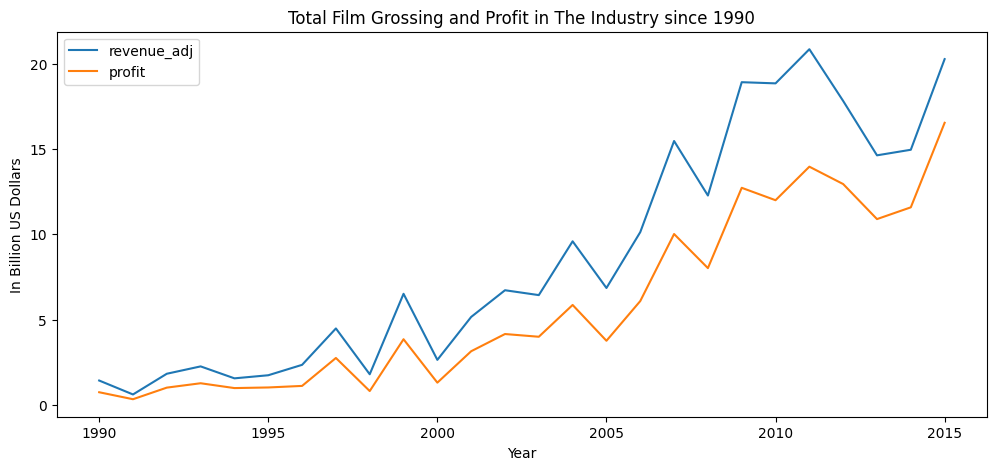

In [43]:
#Create the timeseries 
ax_revpr = yearly_data_2.plot( kind='line', title='Total Film Grossing and Profit in The Industry since 1990', figsize=(12,5))
ax_revpr.set_xlabel('Year')
ax_revpr.set_ylabel('In Billion US Dollars')
ax_revpr.set_yticklabels([0,0,5,10,15,20])

In [44]:
#Average Revenue and Profit timeseries from the year 1990
yearly_avg = df[['release_year', 'revenue_adj', 'profit']].sort_values('release_year')
yearly_avg = yearly_avg[yearly_avg['release_year'] > 1989]

#Group by the year, with sum of profit and revenue
yearly_avg = yearly_avg.groupby('release_year').agg({'revenue_adj':'mean','profit':'mean'})

C:\Users\Ahmad Fadlan Amin\AppData\Local\Temp\ipykernel_1104\978526584.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_avgrev.set_yticklabels([0,100,200,300,400,500])


[Text(0, 0.0, '0'),
 Text(0, 100000000.0, '100'),
 Text(0, 200000000.0, '200'),
 Text(0, 300000000.0, '300'),
 Text(0, 400000000.0, '400'),
 Text(0, 500000000.0, '500'),
 Text(0, 600000000.0, '')]

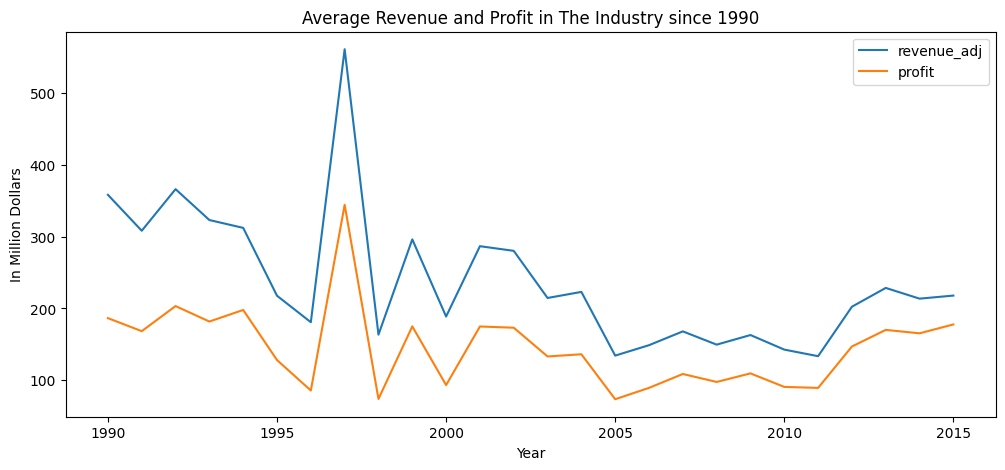

In [77]:
#Create the timeseries 
ax_avgrev = yearly_avg.plot( kind='line', title='Average Revenue and Profit in The Industry since 1990', figsize=(12,5))
ax_avgrev.set_xlabel('Year')
ax_avgrev.set_ylabel('In Million Dollars')
ax_avgrev.set_yticklabels([0,100,200,300,400,500])

In [80]:
#Total Films Revenue and Profit Projection using Linear Regression until 2035 (using data from 1990)
rev_line = df[['release_year', 'revenue_adj', 'profit']].sort_values('release_year')
rev_line = rev_line[rev_line['release_year'] > 1989]
rev_line = rev_line.groupby('release_year').agg({'revenue_adj':'sum','profit':'sum'})

#Create regression for revenue
x = rev_line.index 
y = rev_line['revenue_adj']
res = linregress(x,y)

#Create regression for profit
x_2 = rev_line.index
y_2 = rev_line['profit']
res_2 = linregress(x_2,y_2)

#create year until 2035
year = pd.Series([i for i in range(1990,2025)]) 

#Y axis for revenue
y_rev = res.intercept + res.slope*year

#Y axis for profit
y_pr = res_2.intercept + res_2.slope*year


C:\Users\Ahmad Fadlan Amin\AppData\Local\Temp\ipykernel_1104\3359163278.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_linegress1.set_yticklabels([0,0,5,10,15,20,25])


<function matplotlib.pyplot.show(close=None, block=None)>

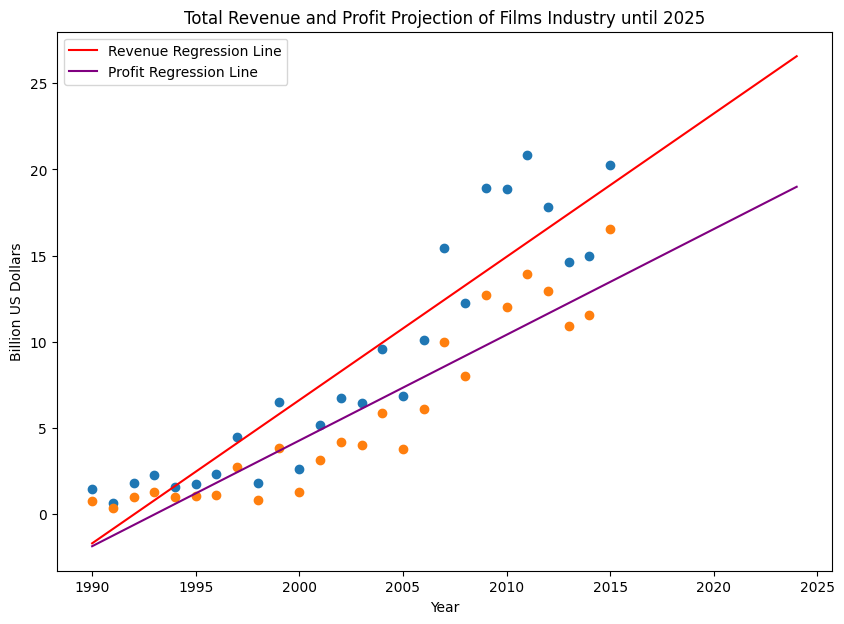

In [84]:
#Create the linear regression line 
fig, ax_linegress1 = plt.subplots(figsize=(10, 7))

#Scatter plot and regression line for Revenue
plt.scatter(x, y)  
plt.plot(year, y_rev ,'red', label='Revenue Regression Line')


#Scatter plot and regression line for Profit
plt.scatter(x_2, y_2)  
plt.plot(year,y_pr ,'purple', label='Profit Regression Line' )


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Billion US Dollars')
plt.title('Total Revenue and Profit Projection of Films Industry until 2025')
ax_linegress1.set_yticklabels([0,0,5,10,15,20,25])
plt.legend()
plt.show

In [48]:
#Average Films Revenue and Profit Projection using Linear Regression until 2035 (using data from 1990)
avg_line = df[['release_year', 'revenue_adj', 'profit']].sort_values('release_year')
avg_line = avg_line[avg_line['release_year'] > 1989]
avg_line = avg_line.groupby('release_year').agg({'revenue_adj':'mean','profit':'mean'})

#Create regression for revenue
x_avg = avg_line.index
y_avg = avg_line['revenue_adj']
res_avg = linregress(x_avg,y_avg)

#Create regression for profit
x_avg2 = avg_line.index
y_avg2 = avg_line['profit']
res_avg2 = linregress(x_avg2,y_avg2)

#create year until 2035
year = pd.Series([i for i in range(1990,2025)]) 

#Y axis for revenue
y_avgrev = res_avg.intercept + res_avg.slope*year

#Y axis for profit
y_avgpr = res_avg2.intercept + res_avg2.slope*year

C:\Users\Ahmad Fadlan Amin\AppData\Local\Temp\ipykernel_1104\2079665376.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_avgline.set_yticklabels([0,100,200,300,400,500])


<function matplotlib.pyplot.show(close=None, block=None)>

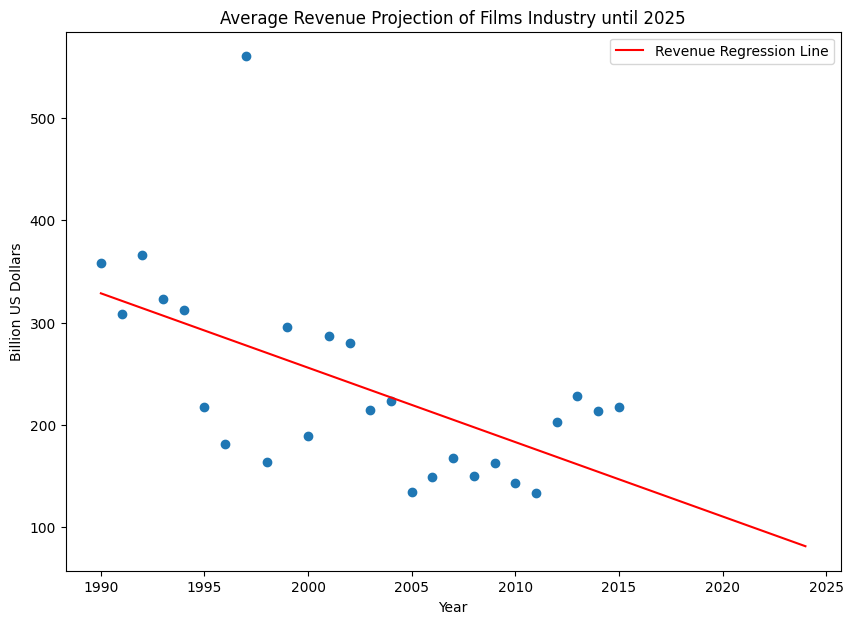

In [89]:
#Create the linear regression line 
fig, ax_avgline = plt.subplots(figsize=(10, 7))

#Scatter plot and regression line for Revenue
plt.scatter(x_avg, y_avg)  
plt.plot(year, y_avgrev ,'red', label='Revenue Regression Line')


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Billion US Dollars')
plt.title('Average Revenue Projection of Films Industry until 2025')
ax_avgline.set_yticklabels([0,100,200,300,400,500])
plt.legend()
plt.show

In [69]:
#Average Films Revenue and Profit Projection using Linear Regression until 2035 (using data from 1990)
quant_line = df[['release_year', 'imdb_id']].sort_values('release_year')
quant_line = quant_line[quant_line['release_year'] > 1989]
quant_line = quant_line.groupby('release_year').agg({'imdb_id':'count'})

#Create regression for revenue
x_quant = quant_line.index
y_quant = quant_line['imdb_id']
res_quant = linregress(x_quant,y_quant)

#create year until 2035
year = pd.Series([i for i in range(1990,2025)]) 

#Y axis for revenue
y_quantrev = res_quant.intercept + res_quant.slope*year

<function matplotlib.pyplot.show(close=None, block=None)>

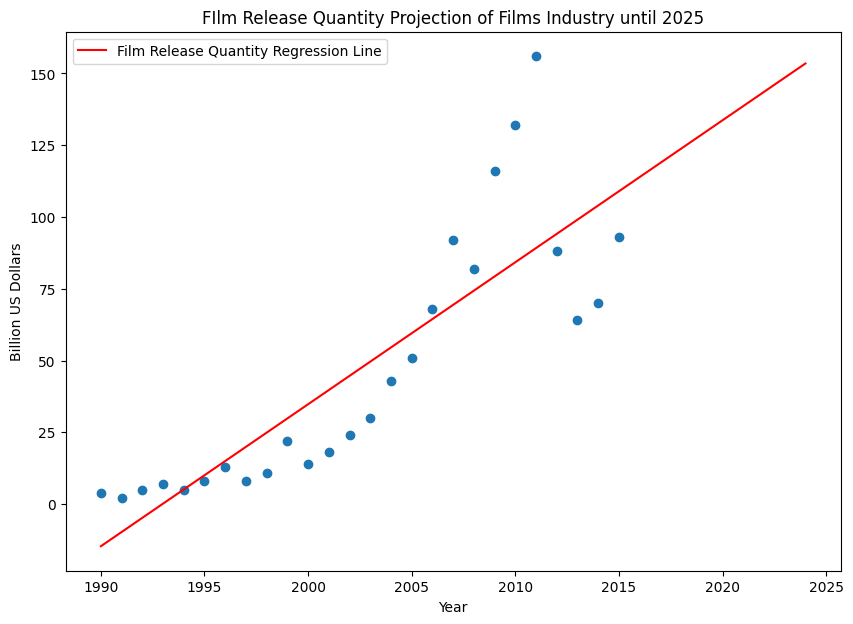

In [70]:
#Create the linear regression line 
fig, ax = plt.subplots(figsize=(10, 7))

#Scatter plot and regression line for Revenue
plt.scatter(x_quant, y_quant)  
plt.plot(year, y_quantrev ,'red', label='Film Release Quantity Regression Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Billion US Dollars')
plt.title('FIlm Release Quantity Projection of Films Industry until 2025')
plt.legend()
plt.show

In [50]:
#Total Grossing and Number of Films in the Industry
yearly_count = df[['release_year', 'revenue_adj']].sort_values('release_year')
yearly_count = yearly_count[yearly_count['release_year'] > 1989]

#Group by the year, with sum of profit and films quantity
yearly_count = yearly_count.groupby('release_year').agg({'revenue_adj':'sum','release_year':'count'})

C:\Users\Ahmad Fadlan Amin\AppData\Local\Temp\ipykernel_1104\1868896991.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([0,0,2.5,5,7.5,10,12.5,15,17.5,20])


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Quantity')]

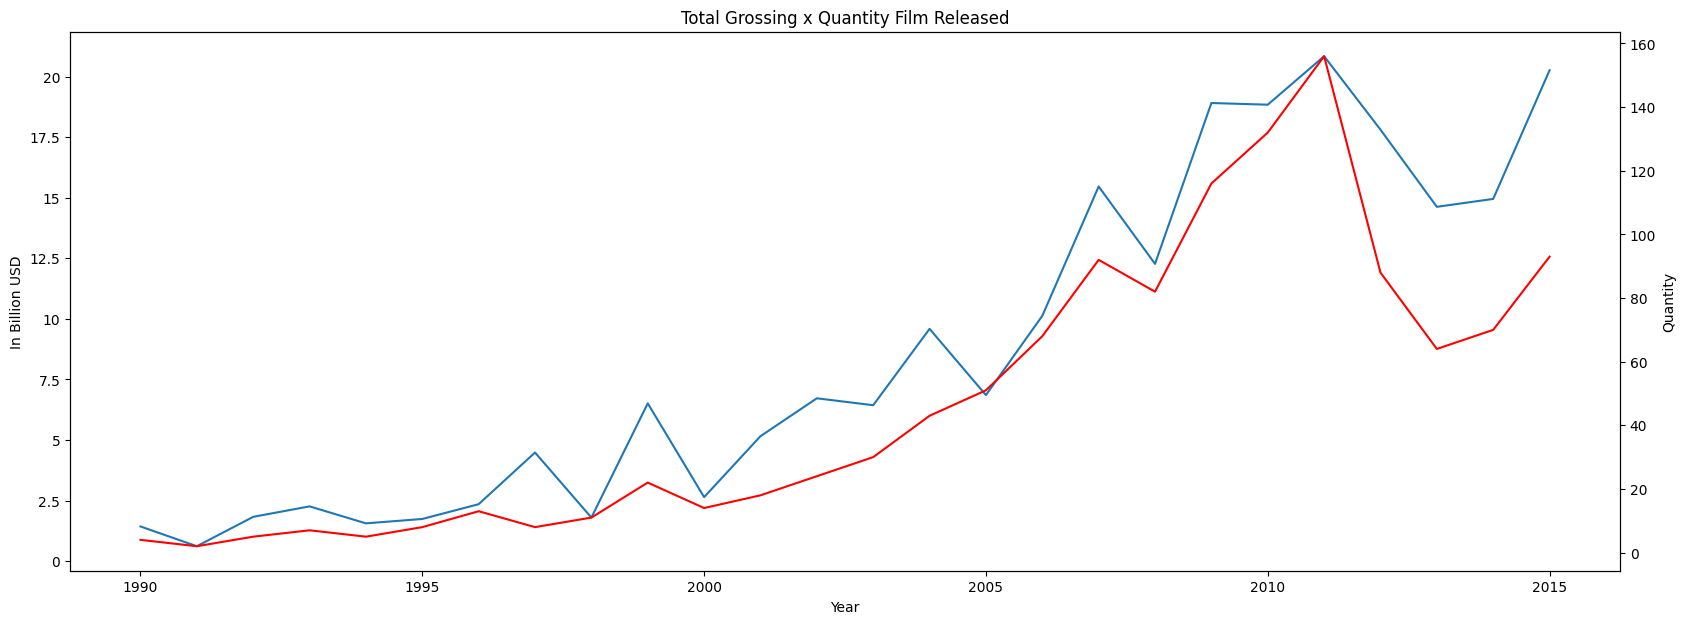

In [60]:
#Side by Side comparison
fig,ax = plt.subplots( figsize=(20,7))

#Total Grossing
ax1 = sns.lineplot(data=yearly_count, x=yearly_count.index , y='revenue_adj')
ax1.set(xlabel='Year', ylabel='In Billion USD', title='Total Grossing x Quantity Film Released')
ax1.set_yticklabels([0,0,2.5,5,7.5,10,12.5,15,17.5,20])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#Number of Films Made
ax2 = sns.lineplot(data=yearly_count, x=yearly_count.index , y='release_year', color='red')
ax2.set(xlabel='Year', ylabel='Quantity')


In [52]:
#Average Films Revenue and Profit Projection using Linear Regression until 2035 (using data from 1990)
budget_line = df[['release_year', 'budget_adj', 'revenue_adj']].sort_values('release_year')
budget_line = budget_line[budget_line['release_year'] > 1989]
budget_line = budget_line.groupby('release_year').agg({'revenue_adj':'mean','budget_adj':'mean'})

#Create regression for revenue
x_bdg = budget_line.index
y_bdg = budget_line['revenue_adj']
res_bdg = linregress(x_bdg,y_bdg)

#Create regression for profit
x_bdg2 = budget_line.index
y_bdg2 = budget_line['budget_adj']
res_bdg2 = linregress(x_bdg2,y_bdg2)

#create year until 2035
year = pd.Series([i for i in range(1990,2025)]) 

#Y axis for revenue
y_bdgrev = res_bdg.intercept + res_bdg.slope*year

#Y axis for profit
y_bdgrev2 = res_bdg2.intercept + res_bdg2.slope*year

<function matplotlib.pyplot.show(close=None, block=None)>

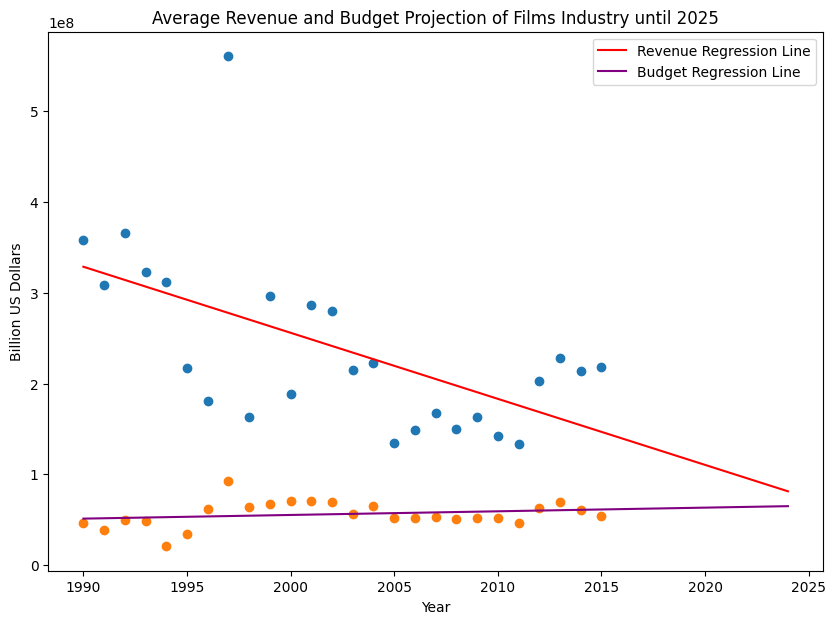

In [53]:
#Create the linear regression line 
fig, ax = plt.subplots(figsize=(10, 7))

#Scatter plot and regression line for Revenue
plt.scatter(x_bdg, y_bdg)  
plt.plot(year, y_bdgrev ,'red', label='Revenue Regression Line')


#Scatter plot and regression line for Profit
plt.scatter(x_bdg2, y_bdg2)  
plt.plot(year,y_bdgrev2 ,'purple', label='Budget Regression Line' )


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Billion US Dollars')
plt.title('Average Revenue and Budget Projection of Films Industry until 2025')
plt.legend()
plt.show

## Revenue Prediction Using Multiple Regression


In [11]:
#with train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [154]:
#Data that will be used for linear regression model is from 1990
df_linreg = df[['release_year', 'budget_adj', 'revenue_adj', 'popularity_code']].sort_values('release_year')
df_linreg = df_linreg[df_linreg['release_year'] > 1989]

In [158]:
#Setting up and Model Training
x_reg = df_linreg[['budget_adj', 'popularity_code']]
y_reg = df_linreg[['revenue_adj']]
xtrain, xtest, ytrain, ytest = train_test_split(x_reg, y_reg, test_size=0.15,  random_state=90)

model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest)) 
#score shows coefficient of determintaion atau r2 (rsquared) 

0.661496394929237


In [159]:
#Testing Prediction
features = np.array([[1000000,4]])
print(model.predict(features))

[[1.21989172e+08]]


c:\Users\Ahmad Fadlan Amin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [172]:
#Function for the prediction
def rev_predictor(budget,pop) : 
    features = np.array([[budget,pop]])
    rev_pred = model.predict(features)
    return rev_pred

In [173]:
#Function Testing
rev_predictor(100000000,3)

c:\Users\Ahmad Fadlan Amin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.34992426e+08]])